In [1]:
import numpy as np
#import modin.pandas as pd
import os
import time
import pandas as pd
from tqdm import tqdm
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import pyplot as plt

In [5]:
time_resolution = 2

data_path = '/mnt/data0/proj_osgeo/data_ASF_trial/network_data'+str(time_resolution)+'/'

c_path = './network_data'+str(time_resolution)+'/commits/'
e_path = './network_data'+str(time_resolution)+'/emails/'
mix_path = './network_data'+str(time_resolution)+'/mix/'
#c_path = './network_data/commits/'

df_social_overlaps = pd.read_csv("./social_overlaps_series"+str(time_resolution)+".csv")
df_social_overlaps = pd.read_csv("./social_overlaps_series"+str(time_resolution)+".csv")
df_mix_overlaps = pd.read_csv("./mix_overlaps_series"+str(time_resolution)+".csv")

projects = os.listdir(c_path)
project_names = [x.split('__')[0] for x in projects]
project_names_social = pd.Series(project_names).drop_duplicates().values

projects = os.listdir(e_path)
project_names = [x.split('__')[0] for x in projects]
project_names_social = pd.Series(project_names).drop_duplicates().values

In [6]:
len(df_social_overlaps)

2

In [7]:
df_social_overlaps

,Pivot,Slider,Gossip,Unomi,ODF Toolkit,Tephra,Superset,Qpid,OpenWebBeans,Ripple,...,AWF,Ignite,Phoenix,Tika,Syncope,SpamAssassin,jUDDI,Tapestry,Griffin,Geronimo
0,"[0.6470588235294118, 0.12121212121212122, 0.4,...","[0.45714285714285713, 0.3783783783783784, 0.43...","[0.13043478260869565, 0.8571428571428571, 0.75...","[0.625, 0.2608695652173913, 0.375, 0.75, 0.7, ...","[0.26666666666666666, 0.41379310344827586, 0.2...","[0.35, 0.4166666666666667, 0.1111111111111111,...","[0.0975609756097561, 0.1111111111111111, 0.0, ...","[0.4106280193236715, 0.44385026737967914, 0.39...","[0.8461538461538461, 0.44, 0.375, 0.7142857142...","[0.6, 0.3333333333333333, 0.42857142857142855,...",...,"[0.3333333333333333, 0.08695652173913043, 0.22...","[0.4838709677419355, 0.7464788732394366, 0.510...",[0.35135135135135137],[1.0],"[0.36470588235294116, 0.31666666666666665, 0.4...",[0.0189897455374098],"[0.5, 0.2]",[],"[0.3076923076923077, 0.5, 0.10344827586206896,...",[1.0]
1,"[0.06060606060606061, 0.4, 0.4]","[0.3142857142857143, 0.32432432432432434, 0.33...","[0.42857142857142855, 0.8571428571428571, 0.5,...","[0.125, 0.375, 0.75, 0.5, 0.3, 0.2307692307692...","[0.3448275862068966, 0.1724137931034483, 0.111...","[0.3333333333333333, 0.0, 0.25, 0.5, 0.25, 0.1...","[0.05555555555555555, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.27807486631016043, 0.25668449197860965, 0.4...","[0.6153846153846154, 0.375, 0.5714285714285714...","[0.28, 0.42857142857142855, 0.1428571428571428...",...,"[0.08695652173913043, 0.1111111111111111, 0.0,...","[0.45161290322580644, 0.5774647887323944, 0.41...",[],[],"[0.2833333333333333, 0.48148148148148145]",[],[0.5],[],"[0.25, 0.25, 0.25, 0.125, 0.25, 0.333333333333...",[]


In [8]:
arr_overlap = df_social_overlaps.iloc[0].apply(lambda x: eval(x)).values.tolist()
arr_overlap

[[0.6470588235294118, 0.12121212121212122, 0.4, 0.4166666666666667],
 [0.45714285714285713,
  0.3783783783783784,
  0.4358974358974359,
  0.4,
  0.3684210526315789,
  0.3673469387755102,
  0.08888888888888889,
  0.3333333333333333,
  0.45454545454545453,
  0.2962962962962963,
  0.15789473684210525,
  0.5555555555555556,
  0.0625,
  0.5,
  0.16666666666666666,
  0.1111111111111111,
  0.25,
  0.09090909090909091,
  0.3333333333333333,
  0.14285714285714285],
 [0.13043478260869565,
  0.8571428571428571,
  0.75,
  0.42105263157894735,
  0.2631578947368421,
  0.4444444444444444,
  0.21428571428571427,
  0.0,
  0.6,
  0.3333333333333333,
  0.16666666666666666,
  0.0],
 [0.625,
  0.2608695652173913,
  0.375,
  0.75,
  0.7,
  0.25,
  0.38461538461538464,
  0.06666666666666667,
  0.0,
  0.0,
  0.375,
  0.75,
  0.1111111111111111,
  0.42857142857142855,
  0.5,
  0.36363636363636365,
  0.6666666666666666,
  0.27586206896551724,
  0.5714285714285714],
 [0.26666666666666666,
  0.41379310344827586,


In [9]:
sum(arr_overlap, [])

[0.6470588235294118,
 0.12121212121212122,
 0.4,
 0.4166666666666667,
 0.45714285714285713,
 0.3783783783783784,
 0.4358974358974359,
 0.4,
 0.3684210526315789,
 0.3673469387755102,
 0.08888888888888889,
 0.3333333333333333,
 0.45454545454545453,
 0.2962962962962963,
 0.15789473684210525,
 0.5555555555555556,
 0.0625,
 0.5,
 0.16666666666666666,
 0.1111111111111111,
 0.25,
 0.09090909090909091,
 0.3333333333333333,
 0.14285714285714285,
 0.13043478260869565,
 0.8571428571428571,
 0.75,
 0.42105263157894735,
 0.2631578947368421,
 0.4444444444444444,
 0.21428571428571427,
 0.0,
 0.6,
 0.3333333333333333,
 0.16666666666666666,
 0.0,
 0.625,
 0.2608695652173913,
 0.375,
 0.75,
 0.7,
 0.25,
 0.38461538461538464,
 0.06666666666666667,
 0.0,
 0.0,
 0.375,
 0.75,
 0.1111111111111111,
 0.42857142857142855,
 0.5,
 0.36363636363636365,
 0.6666666666666666,
 0.27586206896551724,
 0.5714285714285714,
 0.26666666666666666,
 0.41379310344827586,
 0.23076923076923078,
 0.14814814814814814,
 0.13636363

In [10]:
df_incubating = pd.read_csv('/mnt/data0/lkyin/incubating.csv')
df_graduated = pd.read_csv('/mnt/data0/lkyin/graduated.csv')
df_retired = pd.read_csv('/mnt/data0/lkyin/retired.csv')

In [11]:
c_path = '/mnt/data0/lkyin/monthly_data/commits/'
projects = os.listdir(c_path)
print("Total:", len(projects), "months")

proj_names = []
proj_ids= []
proj_status = []
for project in tqdm(projects):
    project_name, period = project.replace('.csv', '').split('__')
    proj_ids.append(project_name)
    if project_name in df_incubating["alias"].values :
        proj_status.append("incubating")
        proj_names.append(str(df_incubating.loc[df_incubating["alias"] == project_name]["project_name"].values[0]))
    elif project_name in df_graduated["alias"].values :
        proj_status.append('graduated')
        proj_names.append(str(df_graduated.loc[df_graduated["alias"] == project_name]["project_name"].values[0]))
    elif project_name in df_retired["alias"].values :
        proj_status.append('retired')
        proj_names.append(str(df_retired.loc[df_retired["alias"] == project_name]["project_name"].values[0]))
    else:
        proj_status.append('unknown')
        proj_names.append('unknown')

Total: 4327 months


100%|██████████| 4327/4327 [00:01<00:00, 3478.56it/s]


In [16]:
social_proj_names = pd.Series(proj_names)
print(social_proj_names.describe())

social_proj_ids = pd.Series(proj_ids)

social_proj_status = pd.Series(proj_status)
print(social_proj_status.unique())

df_proj_social = pd.DataFrame()
df_proj_social['project_name'] = social_proj_names
df_proj_social['project_aliase'] = social_proj_ids
df_proj_social['project_status'] = social_proj_status

df_proj_social = df_proj_social.drop_duplicates()
df_proj_social.describe()

count        4327
unique        263
top       JSPWiki
freq           63
dtype: object
['retired' 'graduated']


,project_name,project_aliase,project_status
count,263,263,263
unique,263,263,2
top,Taverna,taverna,graduated
freq,1,1,204


In [17]:
all_graduated = df_proj_social.where(df_proj_social['project_status']=='graduated')["project_name"].dropna().unique().tolist()
for col in all_graduated:
    if col not in df_social_overlaps:
        all_graduated.remove(col)
    elif col not in df_social_overlaps:
        all_graduated.remove(col)
len(all_graduated)
#print(all_graduated)

204

In [18]:
all_retired = df_proj_social.where(df_proj_social['project_status']=='retired')["project_name"].dropna().unique().tolist()

for col in all_retired:
    if col not in df_social_overlaps:
        all_retired.remove(col)
    elif col not in df_social_overlaps:
        all_retired.remove(col)
#len(all_graduated)
#print(all_graduated)
len(all_retired)
#print(all_graduated)

58

In [19]:
df_social_overlaps_graduated = df_social_overlaps[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(len(df_social_overlaps))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_social_overlaps_graduated.loc[time].apply(lambda x: eval(x)).values.tolist()
    #data_thistime = remove_minus(data_thistime)
    data_thistime = sum(data_thistime,[])
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})

df_social_overlaps_retired = df_social_overlaps[all_retired]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_social_overlaps_retired.loc[time].apply(lambda x: eval(x)).values.tolist()
    #data_thistime = remove_minus(data_thistime)
    data_thistime = sum(data_thistime,[])
    datas_t_retired.append(data_thistime)


labels_time = [x+1 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : social Networks")

[0, 1]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Projects Average Overlap : social Networks')

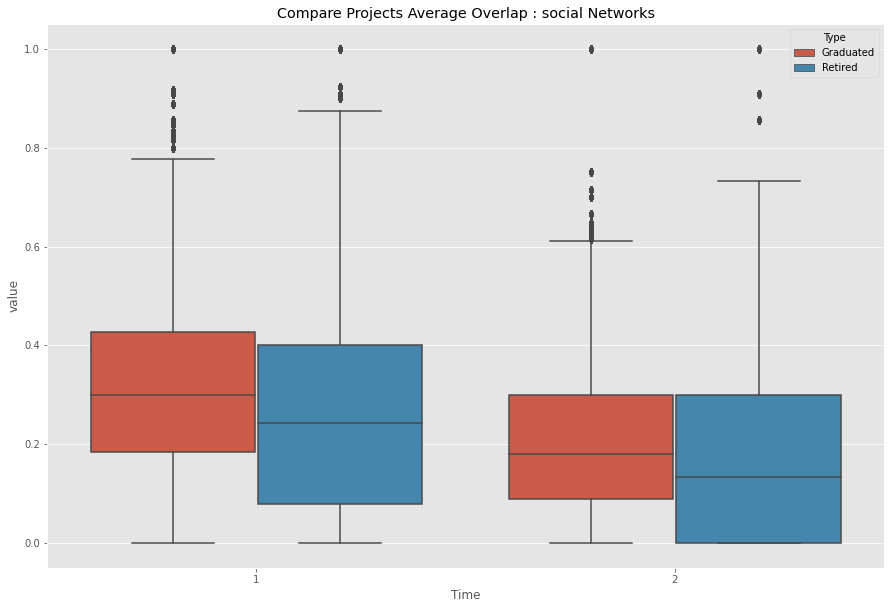

In [20]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')

plt.title("Compare Projects Average Overlap : social Networks")

<AxesSubplot:xlabel='Time', ylabel='value'>

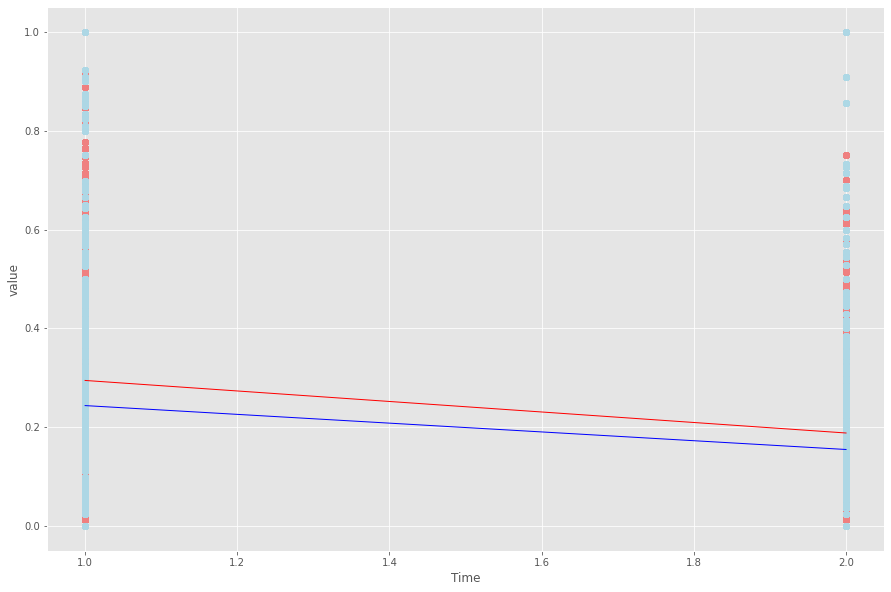

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.regplot(x=dd[dd['Type']=='Graduated']['Time'], y=dd[dd['Type']=='Graduated']['value'], lowess=True, color="lightcoral", 
            line_kws={"color":"red", "linewidth": 1})
sns.regplot(x=dd[dd['Type']=='Retired']['Time'], y=dd[dd['Type']=='Retired']['value'], lowess=True, color="lightblue", 
            line_kws={"color":"blue", "linewidth": 1})

In [22]:
dd

,Time,Type,value
0,1,Graduated,0.366667
1,1,Graduated,0.366667
2,1,Graduated,0.366667
3,1,Graduated,0.366667
4,1,Graduated,0.366667
...,...,...,...
4901757,2,Retired,0.25
4901758,2,Retired,0.307692
4901759,2,Retired,0.0
4901760,2,Retired,0.0


In [23]:
df_social_overlaps_graduated = df_social_overlaps[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(len(df_social_overlaps))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_social_overlaps_graduated.loc[time].apply(lambda x: eval(x)).values.tolist()
    #data_thistime = remove_minus(data_thistime)
    data_thistime = sum(data_thistime,[])
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})

df_social_overlaps_retired = df_social_overlaps[all_retired]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_social_overlaps_retired.loc[time].apply(lambda x: eval(x)).values.tolist()
    #data_thistime = remove_minus(data_thistime)
    data_thistime = sum(data_thistime,[])
    datas_t_retired.append(data_thistime)


labels_time = [x+1 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : social Networks")

[0, 1]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Projects Average Overlap : Social Networks')

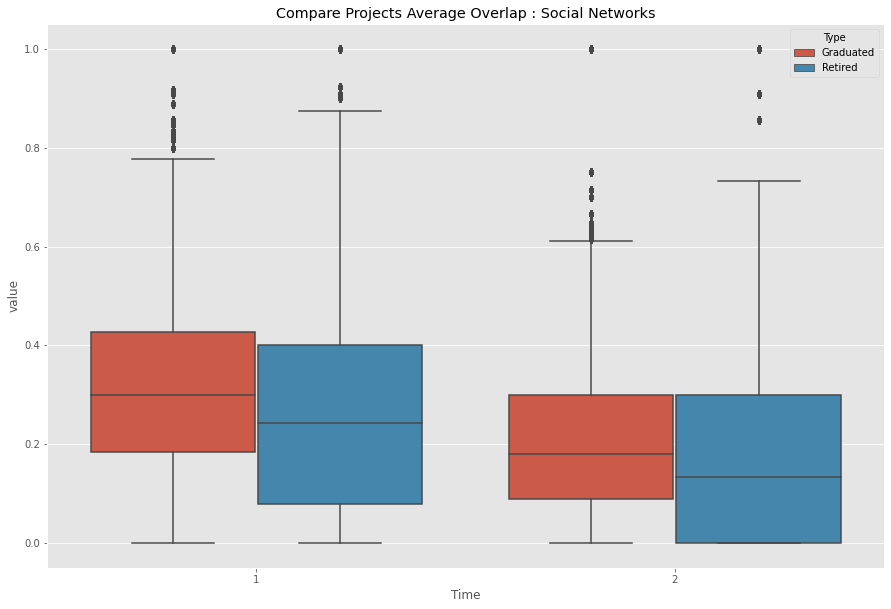

In [24]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')

plt.title("Compare Projects Average Overlap : Social Networks")

<AxesSubplot:xlabel='Time', ylabel='value'>

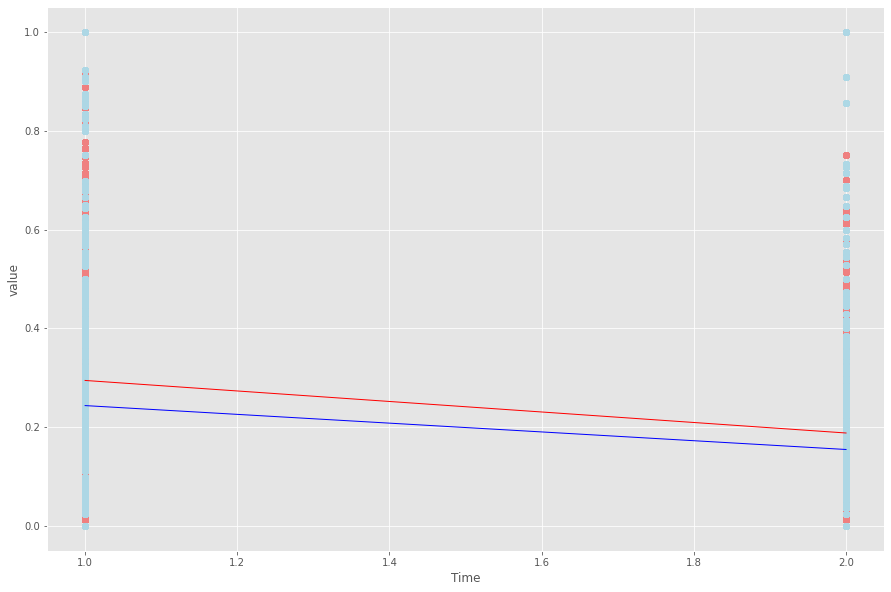

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.regplot(x=dd[dd['Type']=='Graduated']['Time'], y=dd[dd['Type']=='Graduated']['value'], lowess=True, color="lightcoral", 
            line_kws={"color":"red", "linewidth": 1})
sns.regplot(x=dd[dd['Type']=='Retired']['Time'], y=dd[dd['Type']=='Retired']['value'], lowess=True, color="lightblue", 
            line_kws={"color":"blue", "linewidth": 1})